FPS 的單變量ARIMA模型

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import acf, pacf, ARIMA, ArmaProcess
from statsmodels.tsa.stattools import kpss, adfuller
from statsmodels.iolib.smpickle import load_pickle

In [2]:
horizon = pd.read_csv(".\\data\\horizon_3multivariate_final.csv", encoding="utf-8")["FPS"]
horizon_diff = horizon.diff().dropna()

In [3]:
horizon_diff_train = horizon_diff[:-300]
horizon_diff_test = horizon_diff[-300:]

In [4]:
sm_horizon_model113 = ARIMA(horizon_diff_train, order=(1,0,3))
sm_horizon_result113 = sm_horizon_model113.fit()
sm_horizon_result113.summary()

e:\Master\Time Series\TimeSeries\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\Master\Time Series\TimeSeries\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\Master\Time Series\TimeSeries\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    FPS   No. Observations:                 2892
Model:                 ARIMA(1, 0, 3)   Log Likelihood              -10530.795
Date:                Thu, 26 May 2022   AIC                          21073.591
Time:                        23:40:45   BIC                          21109.409
Sample:                             0   HQIC                         21086.499
                               - 2892                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.014      0.079      0.937      -0.027       0.029
ar.L1          0.9003      0.016     55.467      0.000       0.868       0.932
ma.L1         -1.2757      0.021    -61.713      0.000      -1.316      -1.235
ma.L2          0.0994      0.022      4.486      0.000       0.056       0.143
ma.L3          0.1842      0.019      9.935      0.000       0.148       0.220
sigma2        85.1491      1.453     58.593      0.000      82.301      87.997
===================================================================================
Ljung-Box (L1) (Q):                   0.35   Jarque-Bera (JB):              1655.80
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.20
Prob(H) (two-sided):                  0.64   Kurtosis:                         6.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [5]:
forecast = sm_horizon_result113.get_forecast(steps=300).summary_frame()
forecast

e:\Master\Time Series\TimeSeries\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


FPS,mean,mean_se,mean_ci_lower,mean_ci_upper
2892,0.697399,9.227625,-17.388412,18.783211
2893,1.368792,9.856346,-17.949290,20.686875
2894,-0.254308,10.099176,-20.048329,19.539712
2895,-0.228835,10.103127,-20.030600,19.572930
2896,-0.205902,10.106328,-20.013942,19.602137
...,...,...,...,...
3187,0.001144,10.120010,-19.833711,19.835999
3188,0.001144,10.120010,-19.833711,19.835999
3189,0.001144,10.120010,-19.833711,19.835999
3190,0.001144,10.120010,-19.833711,19.835999


In [6]:
# np.save(".\\forecasting result\\arma103.npy", forecast["mean"].to_numpy())

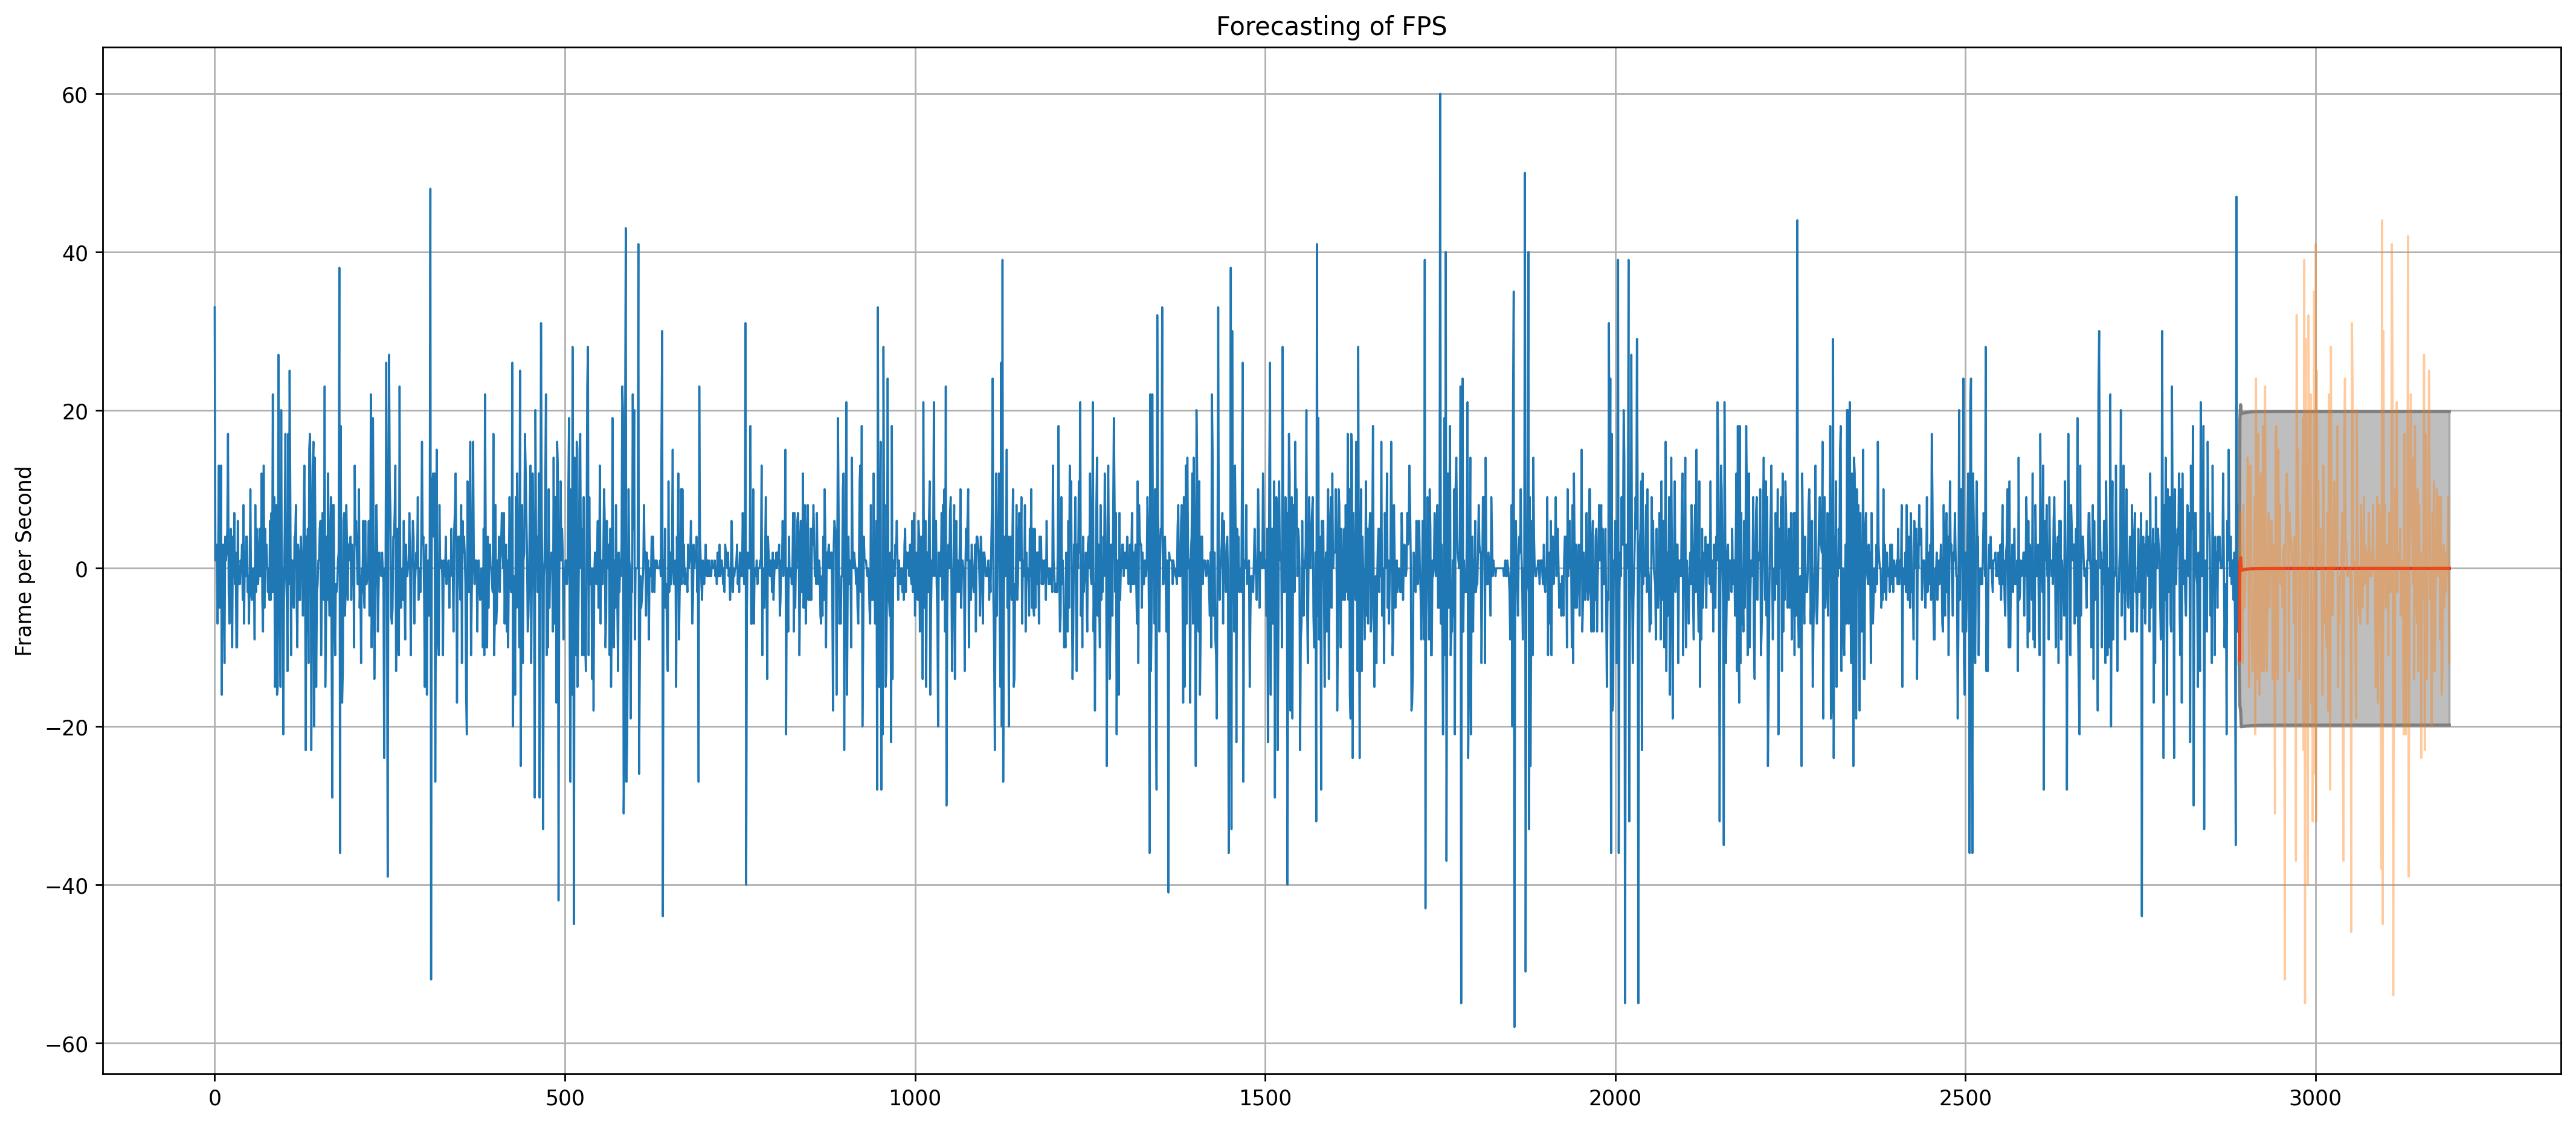

In [7]:
plt.figure(figsize=(21, 9), dpi=250)
plt.plot(list(range(2892)), horizon_diff_train, linewidth=1, c='tab:blue')
plt.plot(list(range(2891, 3192)), upper:=pd.concat([horizon_diff_train, forecast["mean_ci_upper"]]).iloc[2891:], c='tab:gray')
plt.plot(list(range(2891, 3192)), pd.concat([horizon_diff_train, forecast["mean"]]).iloc[2891:], c='tab:red')
plt.plot(list(range(2891, 3192)), lower:=pd.concat([horizon_diff_train, forecast["mean_ci_lower"]]).iloc[2891:], c='tab:gray')
plt.fill_between(list(range(2891, 3192)), upper, lower, color="tab:gray", alpha=0.5)
# plt.plot(list(range(2891, 3192)), horizon_diff_test["FPS"])
plt.plot(
    list(range(2891, 3192)), np.hstack((horizon_diff_train.to_numpy()[-1], horizon_diff_test.to_numpy())),
    linewidth=1, c='tab:orange', alpha=0.4
)
plt.title("Forecasting of FPS")
plt.ylabel("Frame per Second")
plt.grid()
plt.show()

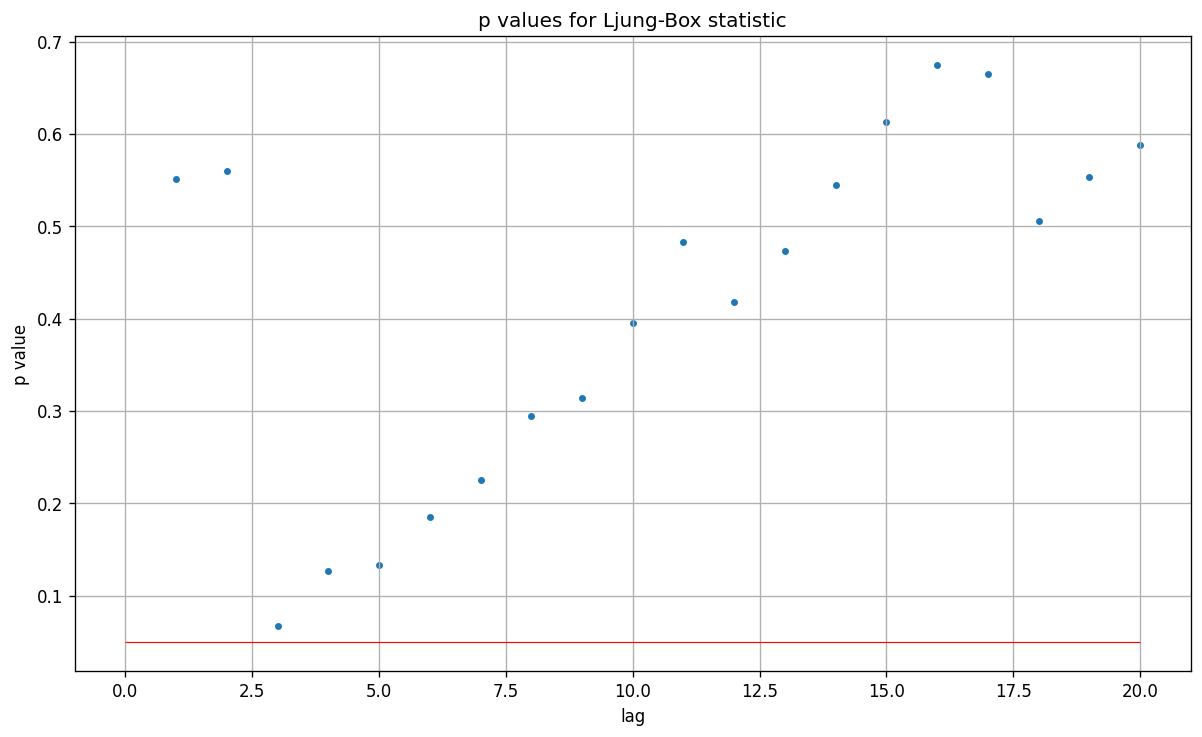

In [8]:
plt.figure(figsize=(12, 7), dpi=120)
plt.scatter(list(range(1,21)), sm_horizon_result113.test_serial_correlation(method="ljungbox", lags=20)[0, 1, :], s=10)
plt.hlines(y=[0.05], xmin=0, xmax=20, colors="r", linewidths=0.7)
plt.title("p values for Ljung-Box statistic")
plt.xlabel("lag")
plt.ylabel("p value")
plt.grid()
plt.show()

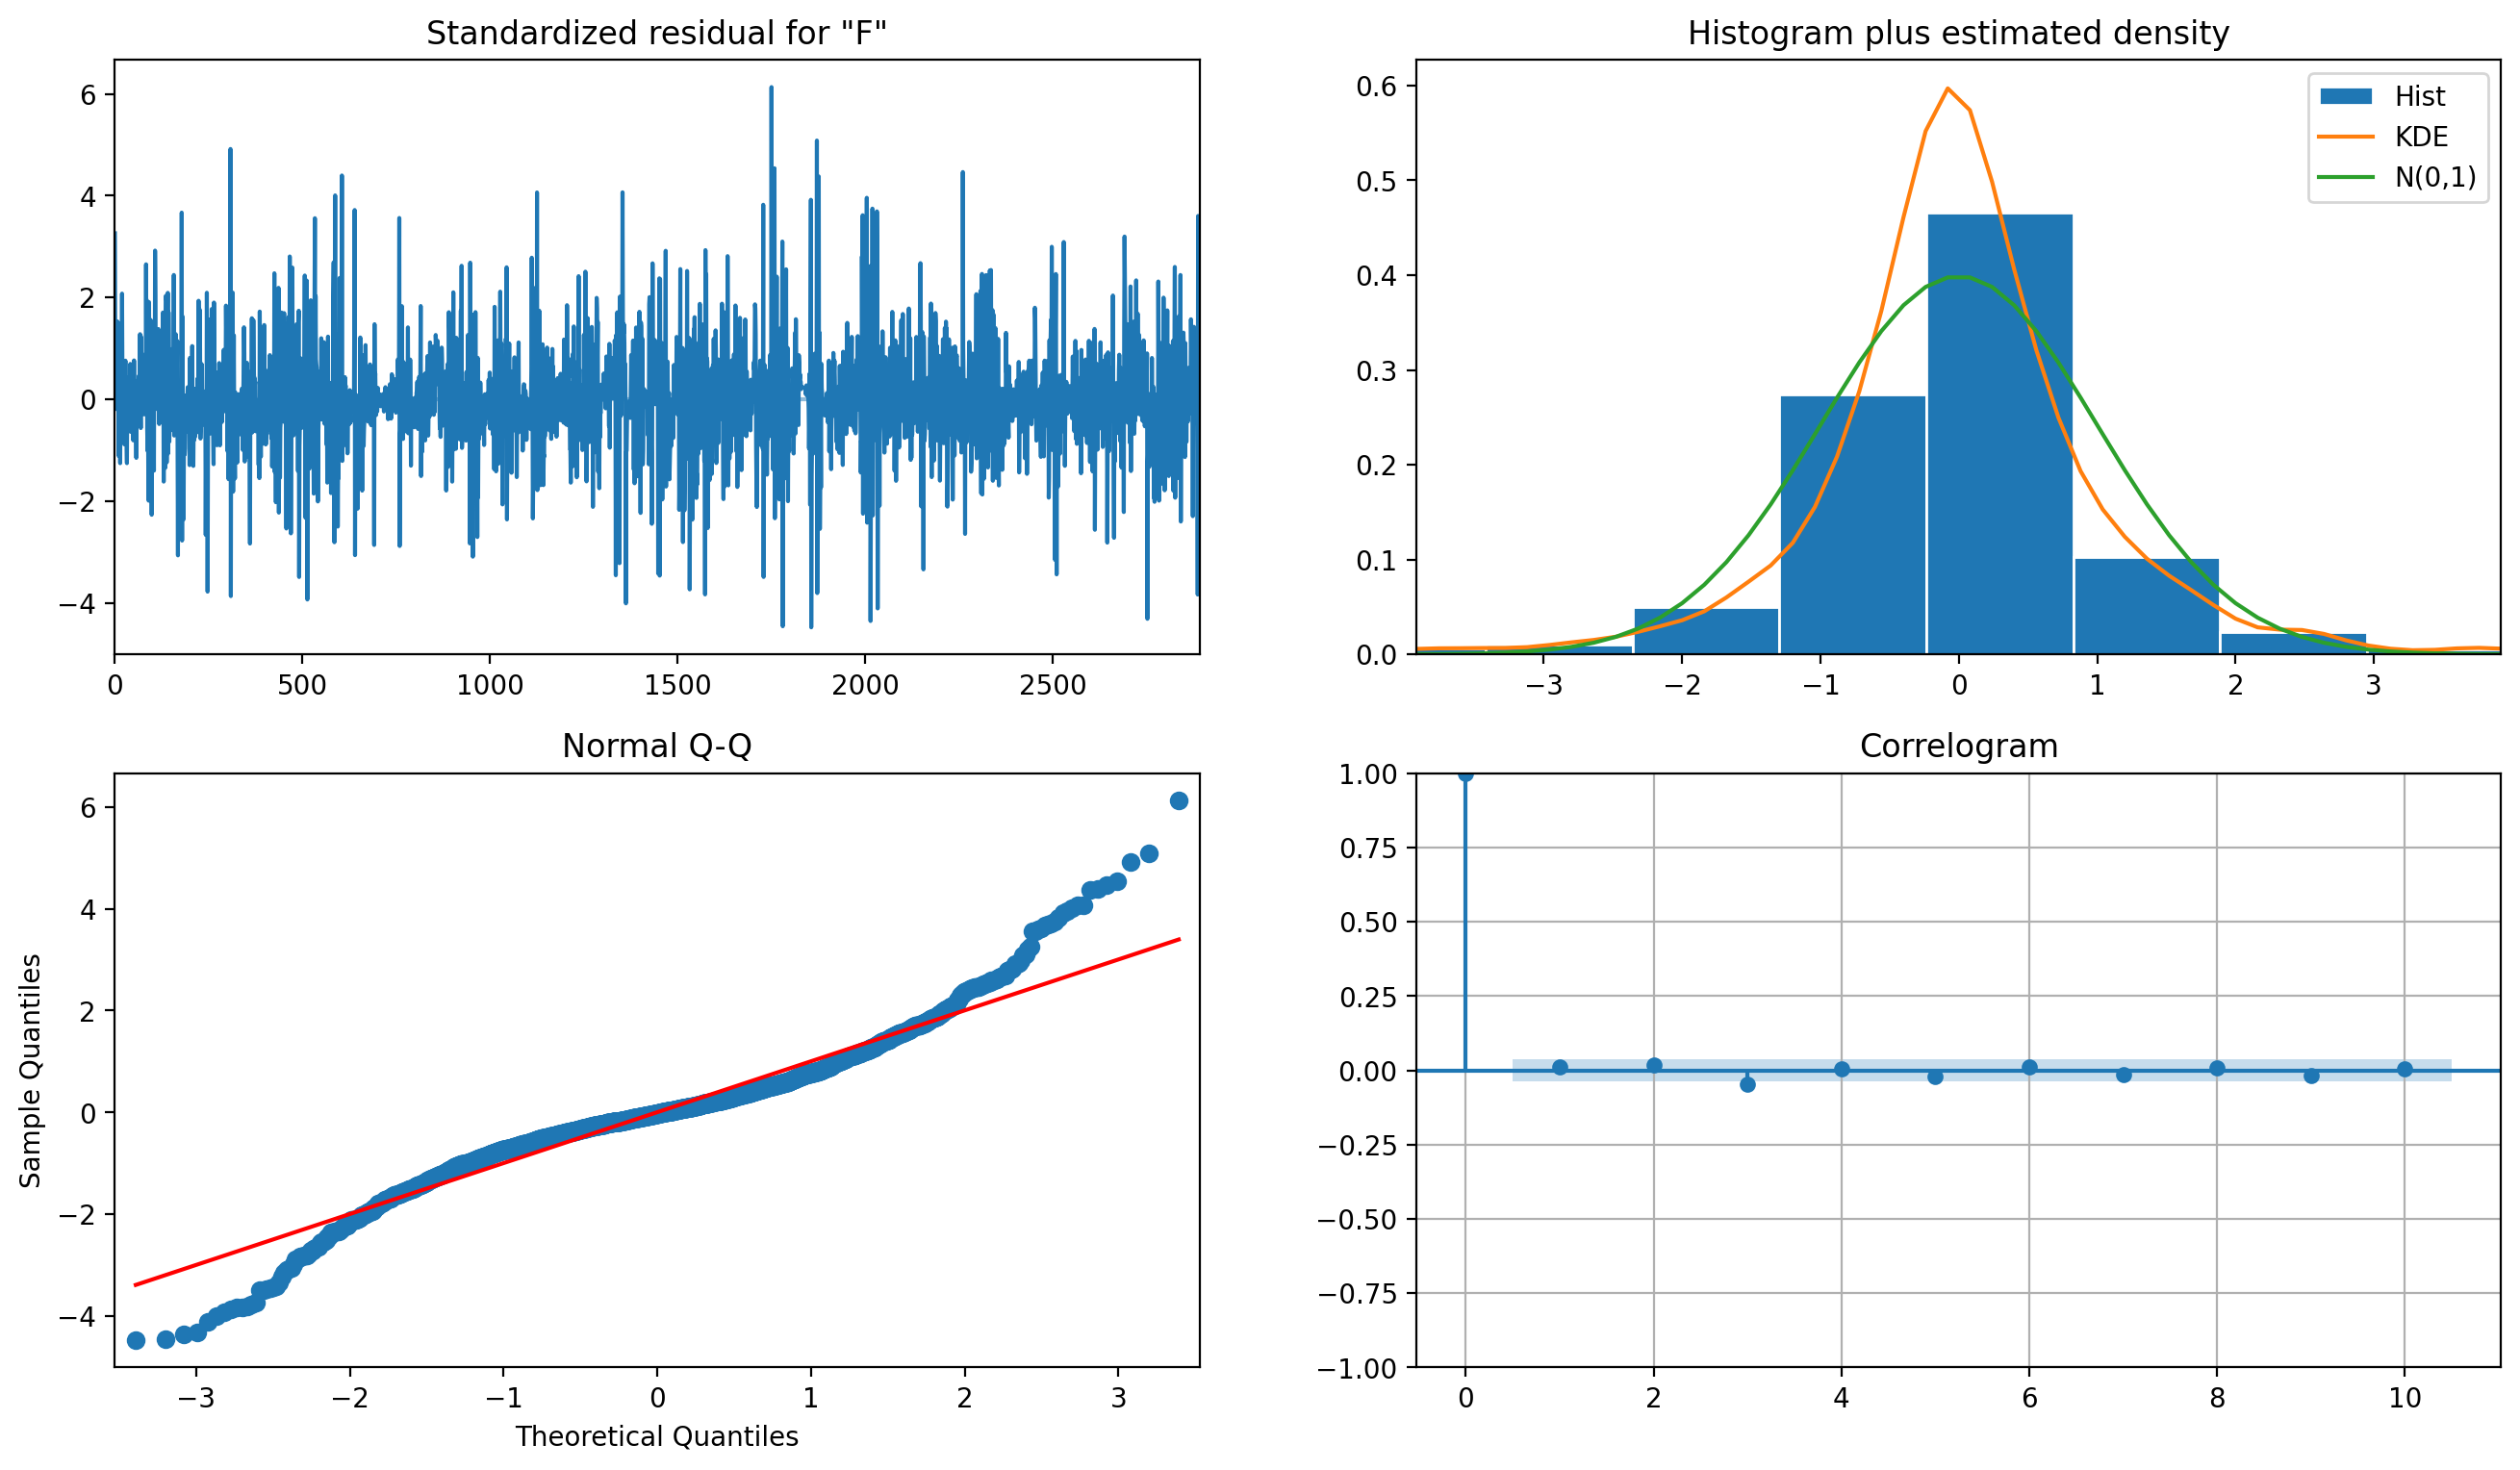

In [9]:
sm_horizon_result113.plot_diagnostics(fig=plt.figure(figsize=(16,9), dpi=200))
plt.grid()
plt.show()